# Import Dependencies

In [126]:
import sys
assert sys.version_info >= (3, 7)
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [127]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

# Data Exploration

In [128]:
housing = pd.read_csv('./housing.csv')
housing.head(100) 

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY
97,-122.26,37.81,29.0,335.0,107.0,202.0,91.0,2.0062,125000.0,NEAR BAY
98,-122.26,37.82,22.0,3682.0,1270.0,2024.0,1250.0,1.2185,170000.0,NEAR BAY


In [129]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [130]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [131]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

<Axes: ylabel='ocean_proximity'>

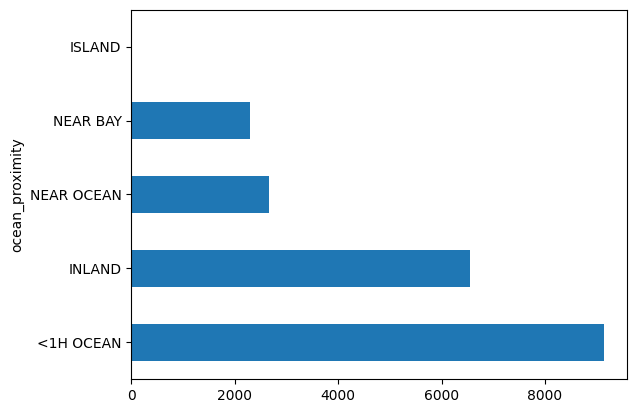

In [132]:
housing["ocean_proximity"].value_counts().plot(kind="barh")

<function matplotlib.pyplot.show(close=None, block=None)>

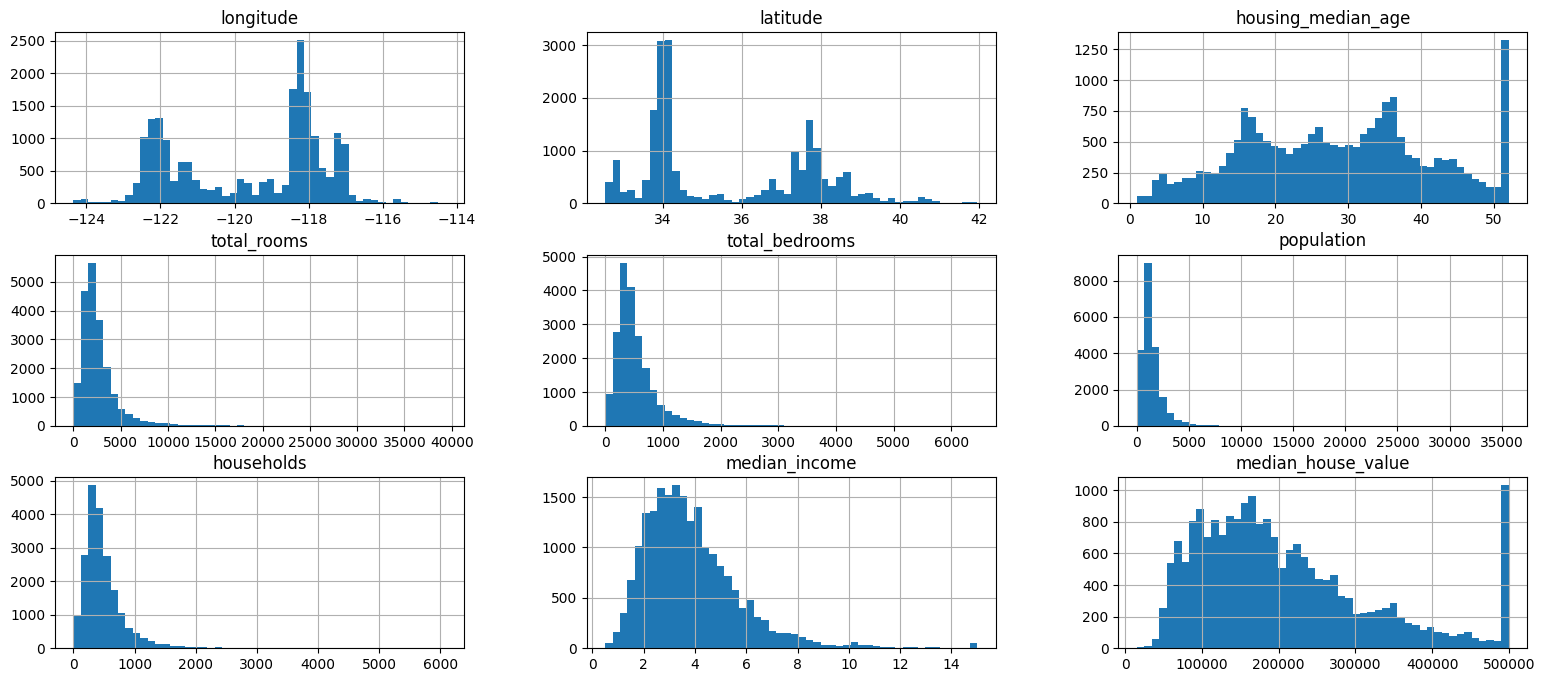

In [133]:
housing.hist(bins=50, figsize=(19,8))
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

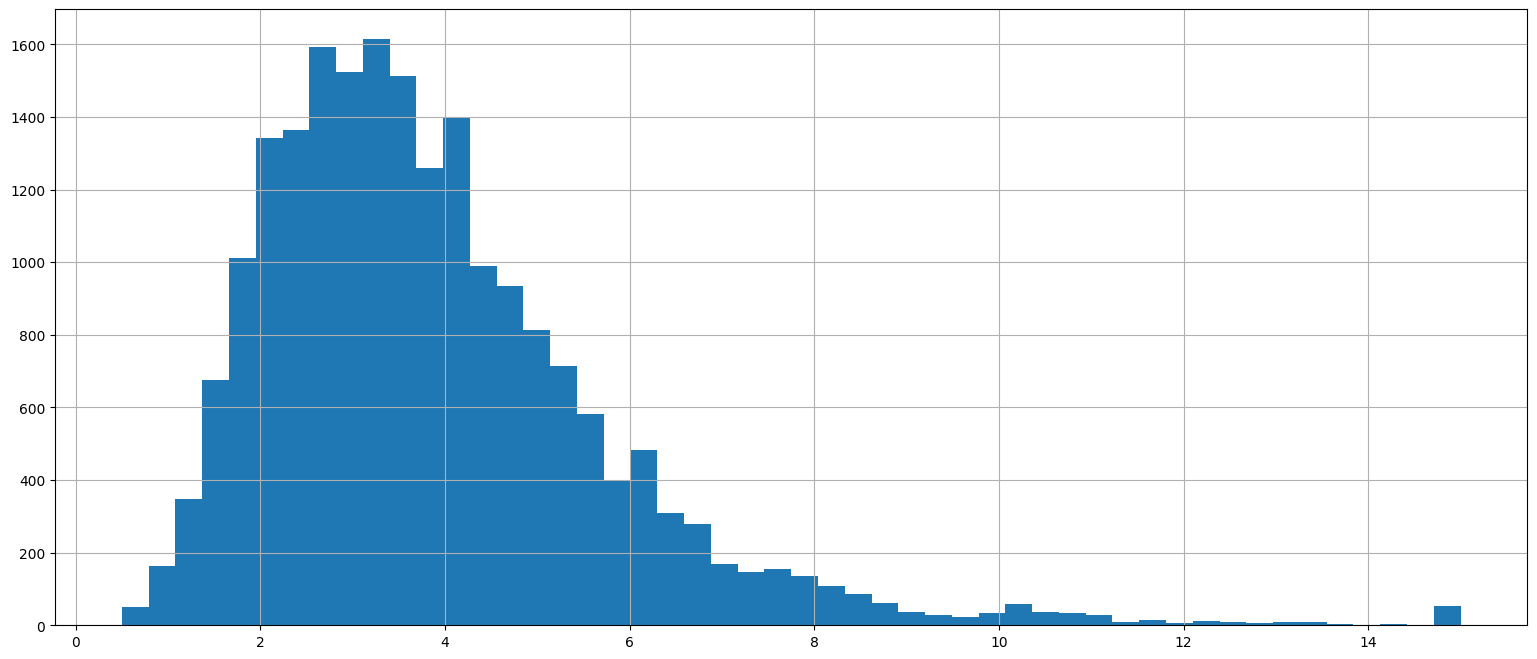

In [134]:
housing["median_income"].hist(bins=50, figsize=(19,8))
plt.show

In [135]:
from sklearn.model_selection import train_test_split
train_set, test_se = train_test_split(housing, test_size=0.2, random_state=42)

In [136]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6.0, np.inf], labels=[1,2,3,4,5])

Text(0, 0.5, 'Number of Districts')

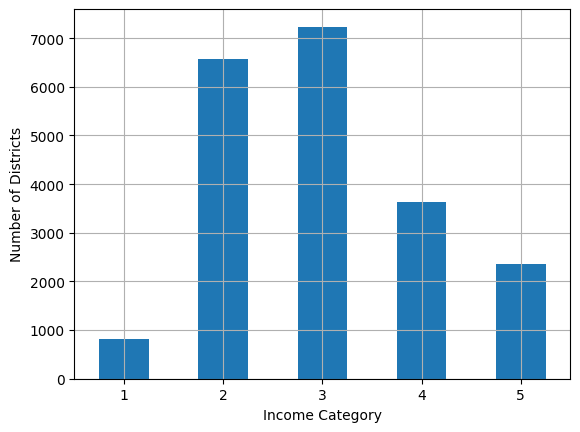

In [137]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of Districts")

In [138]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

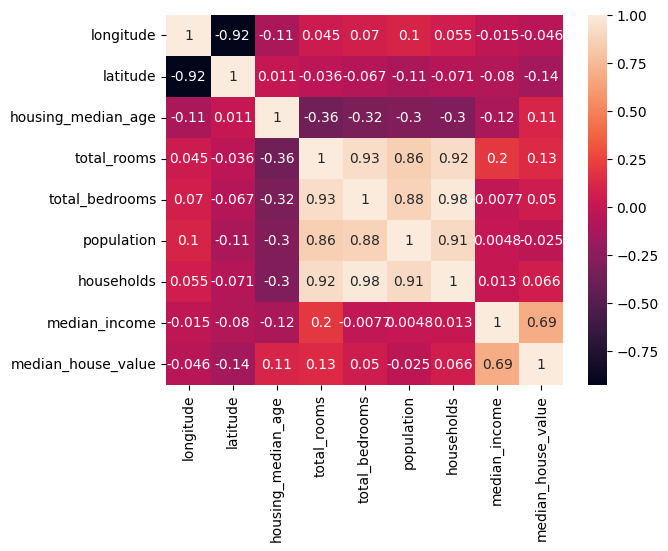

In [139]:
glue = sns.heatmap(corr_matrix, annot=True)

# Feature Engineering

In [140]:
housing["rooms_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["people_per_house"] = housing["population"] / housing["households"]

In [141]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
rooms_per_house       0.151948
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
people_per_house     -0.023737
population           -0.024650
longitude            -0.045967
latitude             -0.144160
bedrooms_ratio       -0.255880
Name: median_house_value, dtype: float64

# Visualizing Geographic Data

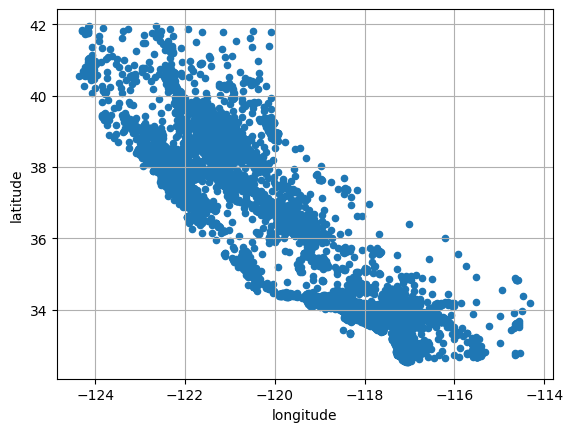

In [142]:

housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

<Axes: xlabel='longitude', ylabel='latitude'>

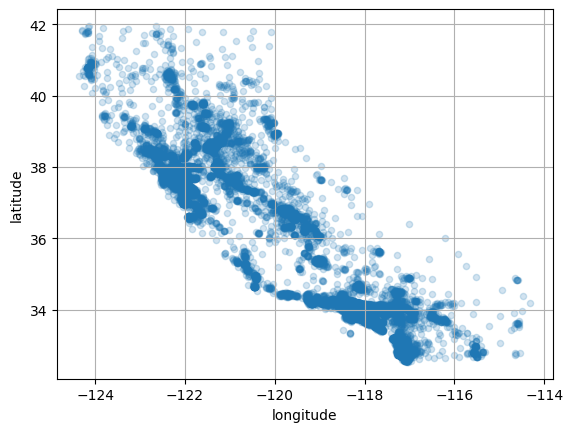

In [143]:
housing.plot(kind="scatter", x="longitude", y='latitude', grid=True, alpha=0.2)

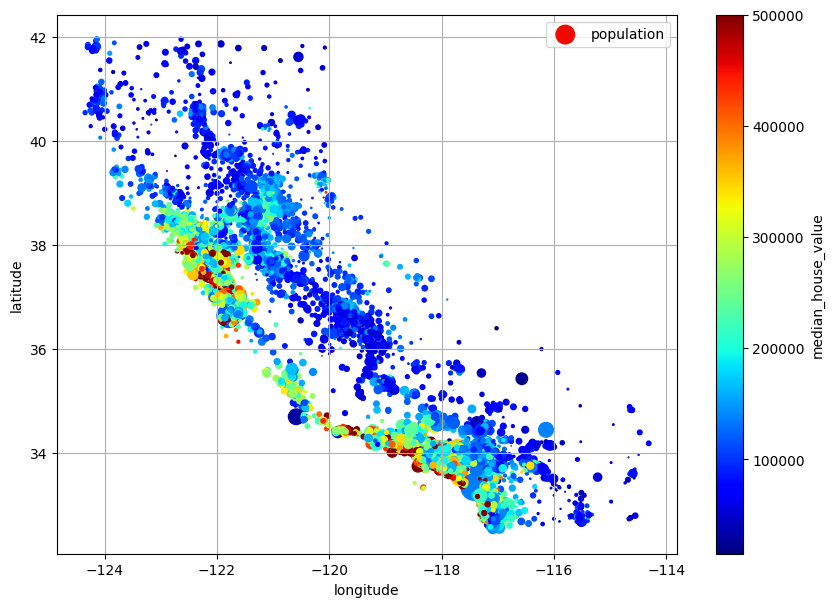

In [144]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()

# Separating Features "X" and labels "y"
keep in mind we have not defined the training and testing split

In [145]:
y = housing['median_house_value']
X = housing.drop('median_house_value', axis=1)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat,rooms_per_house,bedrooms_ratio,people_per_house
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY,5,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY,5,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY,5,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY,4,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY,3,6.281853,0.172096,2.181467
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND,2,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND,2,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND,2,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND,2,5.329513,0.219892,2.123209


# Split Datasets

In [146]:
# Here we are splitting the housing data that we have into a training and testing set split. 

# from sklearn.model_selection import train_test_split 
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [147]:
housing_data = housing.copy() #Take a copy so we can revert back to the original dataset if needed

housing_data["income_cat"] = pd.cut(housing_data["median_income"], 
bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
labels=[1, 2, 3, 4, 5])

In [148]:
# Stratified Split - We are applying a stratified splitting technqiue so that when we split the testing an training the model won't be training on a biased set. 
from sklearn.model_selection import StratifiedShuffleSplit 


split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]): 
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index] 

In [149]:
# When we display the newly created strat test data set and raw data set we can see that the outputted number is very similar, therefore we can assert that the distribution between the two sets is very similar. 
# Thus we have successfully implemented a stratified testing set. 
strat_test_set["income_cat"].value_counts() / len(strat_test_set), housing["income_cat"].value_counts() / len(housing)

(income_cat
 3    0.350533
 2    0.318798
 4    0.176357
 5    0.114341
 1    0.039971
 Name: count, dtype: float64,
 income_cat
 3    0.350581
 2    0.318847
 4    0.176308
 5    0.114438
 1    0.039826
 Name: count, dtype: float64)

In [150]:
strat_train_set.drop("income_cat", axis="columns", inplace=True)
strat_test_set.drop("income_cat", axis="columns", inplace=True)

In [151]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# Visualizing Numerical Data

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>],
       [<Axes: title={'center': 'rooms_per_house'}>,
        <Axes: title={'center': 'bedrooms_ratio'}>,
        <Axes: title={'center': 'people_per_house'}>]], dtype=object)

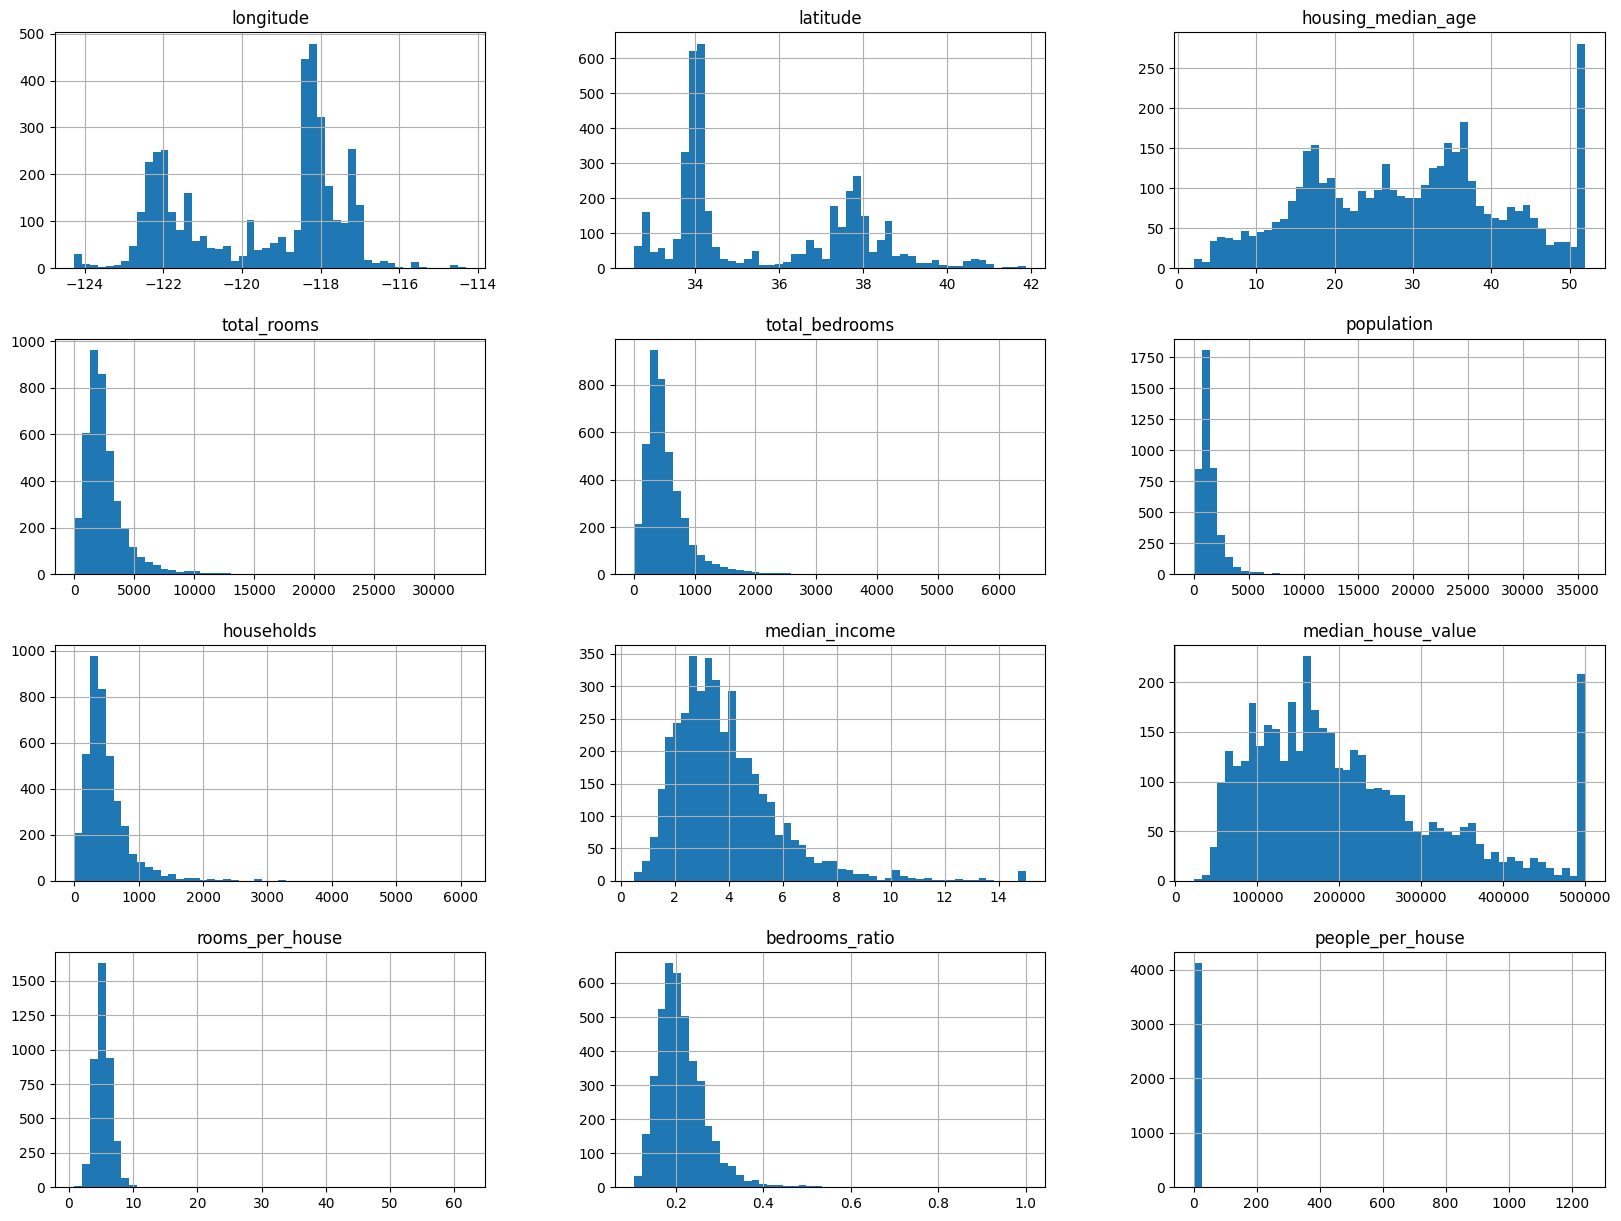

In [152]:
strat_test_set.hist(bins=50, figsize=(20,15))

In [153]:
housing_num = housing.select_dtypes(include=[np.number])
imputer.fit(housing_num)

NameError: name 'imputer' is not defined

In [ ]:
imputer.statistics_

**Handling Text and Categorical Attributes** 

In Machine Learning, we mainily deal with numerical attributes so that we can plot and create a model around it. With text attributes we need to try and covert it into a numerical value. A common technique that is applied is to create one-hot encoded vectors. It is used since number values does not depict the relationship of the text. So to view attributes as 0 and 1s makes the model learn better without having to worry about near by values. 

In [ ]:
housing_cat = housing[['ocean_proximity']]
housing_cat.value_counts()

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]


In [ ]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder() 
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot.toarray()

# Feature Scaling

Here we are implementing feature scaling since Machine Learning algorithms don't perform well when the input numerical attributes have different scales. We are also choosing standardization instead of normalization; relative to normalization, standardization would't be as skwed. 

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler() 

housing_num_std_scaled = std_scaler.fit_transform(housing_num)

In [ ]:
from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame()) 